##Visualizing COVID-19 Deaths by State

In [ ]:
#load packages
suppressPackageStartupMessages(library(dplyr, ggplot2))

In [ ]:
#read in data
covid_data <- read.csv("https://covidtracking.com/api/v1/states/daily.csv")

In [27]:
#view the data
head(covid_data)
names(covid_data)

date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,statemax
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
20200428,AK,351,16738,NA,16,NA,NA,NA,NA,⋯,17089,17089,17089,2,0,0,827,6,833,9
20200428,AL,6687,69140,NA,NA,911,NA,335,NA,⋯,75827,75827,75827,1,20,39,1642,188,1830,242
20200428,AR,3111,37560,NA,104,NA,NA,NA,20,⋯,40671,40671,40671,5,2,0,120,94,214,52
20200428,AS,0,3,17,NA,NA,NA,NA,NA,⋯,20,3,3,60,0,0,0,0,0,0
20200428,AZ,6948,60490,NA,737,1095,303,NA,193,⋯,67438,67438,67438,4,18,44,663,232,895,293
20200428,CA,45031,532577,NA,4983,NA,1485,NA,NA,⋯,577608,577608,577608,6,54,0,22632,1567,24199,1809


[1] "date"                     "state"                   
 [3] "positive"                 "negative"                
 [5] "pending"                  "hospitalizedCurrently"   
 [7] "hospitalizedCumulative"   "inIcuCurrently"          
 [9] "inIcuCumulative"          "onVentilatorCurrently"   
[11] "onVentilatorCumulative"   "recovered"               
[13] "hash"                     "dateChecked"             
[15] "death"                    "hospitalized"            
[17] "total"                    "totalTestResults"        
[19] "posNeg"                   "fips"                    
[21] "deathIncrease"            "hospitalizedIncrease"    
[23] "negativeIncrease"         "positiveIncrease"        
[25] "totalTestResultsIncrease" "statemax"

In [28]:
#new variable for max deaths per state
covid_data <-
    covid_data %>%
    group_by(state) %>%
    mutate(statemax = max(na.omit(death)))

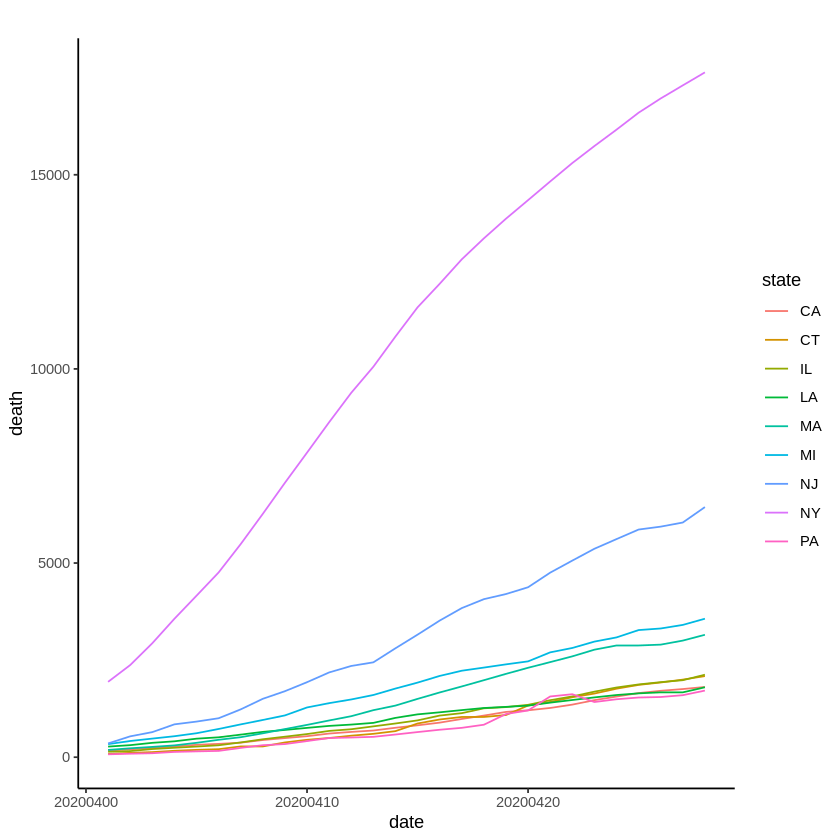

In [29]:
#visualize curve since April 1st in states with more than 1500 deaths
ggplot(covid_data %>% filter(date > 20200400 & statemax > 1500)) +
    geom_line(aes(x = date, y = death, group = state, color = state)) +
    theme_classic() +
    labs(title = "")